In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn import linear_model
from MLCode.KCrossVal import kFoldCross
from MLCode.utils import load_shuffled_cup, np_cup_TR, plot_NN_TR_VAL
import torch
from torch import nn
import itertools
from MLCode.ELM import ExtremeLearningMachine, load_results, save_results
import matplotlib.pyplot as plt


In [47]:
df = load_shuffled_cup()
X_dev, Y_dev = np_cup_TR(df, test=False)

layers_list = [
    [10, 1000],
    [10, 200]
]
torch.set_grad_enabled(False)

# alpha_list = [0.01, 0.05, 0.1, 0.5]
alpha_list = [0.000005, 0.00001, 0.00005, 0.0001]
function_list = ['Sigmoid']

HP_list = itertools.product(layers_list, alpha_list, function_list)
results = []
for HyperParam in HP_list:
    layers, alpha, activation_f = HyperParam

    EML_model = ExtremeLearningMachine(layers, alpha, activation_f)

    res = kFoldCross(EML_model.fit, EML_model.predict, X_dev, Y_dev, 5)
    res = len(layers)-1,  layers[1], alpha, activation_f, res[0], res[1], res[2]
    results.append(res)

columns=['n_layers', 'size', 'alpha', 'activation_f', 'MEE_mean', 'MEE_std', 'seconds']
df = pd.DataFrame(results, columns=columns)
# save results
save_results(df)
# load all saved results
df = load_results()



In [48]:
# load all saved results
df = load_results()
df.sort_values(by=['MEE_mean'])

,n_layers,size,alpha,activation_f,MEE_mean,MEE_std,seconds
9,1,5000,0.050000,LeakyRelu,3.023234,0.125672,1.843454
12,1,8000,0.010000,LeakyRelu,3.029008,0.135732,2.088915
13,1,8000,0.050000,LeakyRelu,3.034376,0.126161,2.019707
10,1,5000,0.100000,LeakyRelu,3.039412,0.165260,1.449941
14,1,8000,0.100000,LeakyRelu,3.067312,0.158331,2.890813
8,1,5000,0.010000,LeakyRelu,3.079948,0.147230,1.672584
1,1,2000,0.050000,LeakyRelu,3.100452,0.191025,1.169903
2,1,2000,0.100000,LeakyRelu,3.131022,0.141481,1.289396
0,1,2000,0.010000,LeakyRelu,3.162264,0.124099,1.236673
5,1,1000,0.050000,LeakyRelu,3.165083,0.140016,0.928993


' '

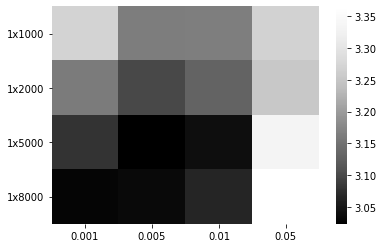

In [30]:
df2 = df.loc[df['activation_f'] == 'LeakyRelu']
df2 = df2.sort_values(by=['n_layers', 'size', 'alpha'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 4)
yticklabels = ['1x1000', '1x2000', '1x5000', '1x8000']
sns.heatmap(array, xticklabels=alpha_list, yticklabels=yticklabels,cmap='Greys_r')
plt.yticks(rotation=0)
' '



' '

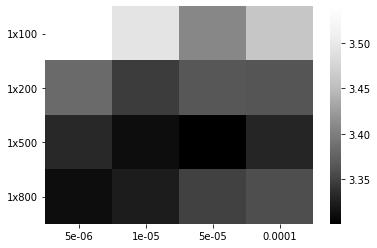

In [50]:
df2 = df.loc[df['activation_f'] == 'Sigmoid']
df2 = df2.sort_values(by=['n_layers', 'size', 'alpha'])
array = df2['MEE_mean'].to_numpy()
array = array.reshape(-1, 4)
yticklabels = ['1x100', '1x200', '1x500', '1x800']
sns.heatmap(array, xticklabels=alpha_list, yticklabels=yticklabels,cmap='Greys_r')
plt.yticks(rotation=0)
' '